In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


# Data Gathering

In [163]:
df=pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\Kmeans\walmart-sales-dataset-of-45stores.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# EDA

In [164]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [166]:
df.shape

(6435, 8)

In [167]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [168]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Feature Engineering

In [169]:
df=df.drop("Date",axis=1)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


In [170]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Store             0
Weekly_Sales     34
Holiday_Flag    450
Temperature       3
Fuel_Price        0
CPI               0
Unemployment    481
dtype: int64


In [171]:
# To replace outliers
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = df.columns

Finding_outliar1(df,columns)

-21.0
67.0
-746862.7275
2720371.4924999997
0.0
0.0
6.240000000000002
116.16
1.7299999999999998
4.938
10.222559825000019
334.255733625
4.2945
11.218499999999999


In [172]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


# Scalling by standardScalar

In [173]:
std=StandardScaler()
std_array=std.fit_transform(df)
df_std=pd.DataFrame(std_array,columns=df.columns)
df_std

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-1.693979,1.074309,0.0,-0.995450,-1.713800,1.004175,0.154410
1,-1.693979,1.071198,0.0,-1.201534,-1.766089,1.007880,0.154410
2,-1.693979,1.017382,0.0,-1.124524,-1.840166,1.009074,0.154410
3,-1.693979,0.654458,0.0,-0.761165,-1.737766,1.009849,0.154410
4,-1.693979,0.914805,0.0,-0.768215,-1.598328,1.010624,0.154410
...,...,...,...,...,...,...,...
6430,1.693979,-0.595520,0.0,0.228581,1.390883,0.519270,0.534529
6431,1.693979,-0.559125,0.0,0.229123,1.364738,0.523256,0.523349
6432,1.693979,-0.557314,0.0,-0.335981,1.397419,0.527241,0.523349
6433,1.693979,-0.586634,0.0,-0.227516,1.329879,0.527332,0.523349


In [174]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [175]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

# 2D clustering on Temperature,Fuel_Price


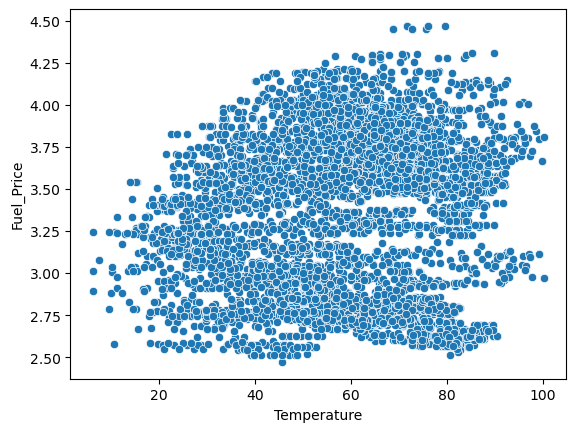

In [176]:
sns.scatterplot(x = df["Temperature"],y = df["Fuel_Price"])
plt.savefig("SCATTER")

## Elbow method

In [177]:
df1=df[["Temperature","Fuel_Price"]]
df1

,Temperature,Fuel_Price
0,42.31,2.572
1,38.51,2.548
2,39.93,2.514
3,46.63,2.561
4,46.50,2.625
...,...,...
6430,64.88,3.997
6431,64.89,3.985
6432,54.47,4.000
6433,56.47,3.969


In [178]:
wcss_list = []
k = np.arange(1,10)

for i in k:
    kmeans = KMeans(i)
    kmeans.fit(df1)
    kmeans.predict(df1)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)

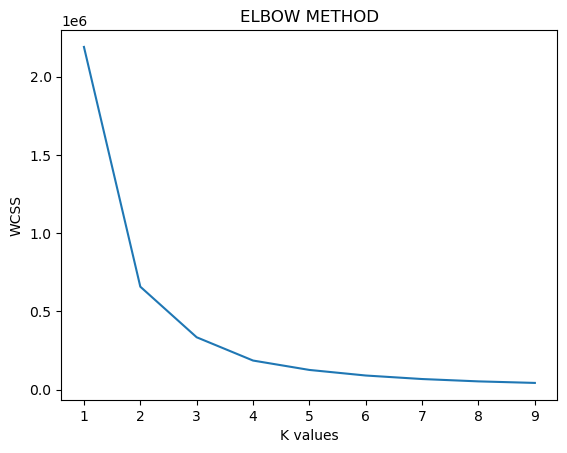

In [179]:
plt.plot(k,wcss_list)
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.savefig("1")

## k=4

In [180]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [181]:
kmeans.fit(df1)

KMeans(n_clusters=4)

In [182]:
prediction = kmeans.predict(df1)
y = pd.DataFrame(prediction)

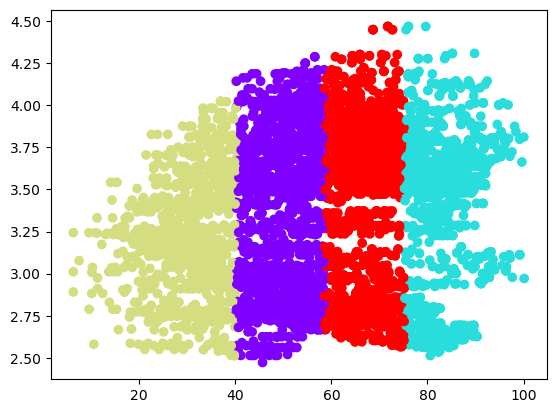

In [183]:
plt.scatter(x = df1["Temperature"], y = df1["Fuel_Price"],c=prediction,cmap="rainbow")
plt.savefig("2D-1")

## k=3

In [184]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [185]:
kmeans.fit(df1)

KMeans(n_clusters=3)

In [186]:
prediction = kmeans.predict(df1)
y = pd.DataFrame(prediction)

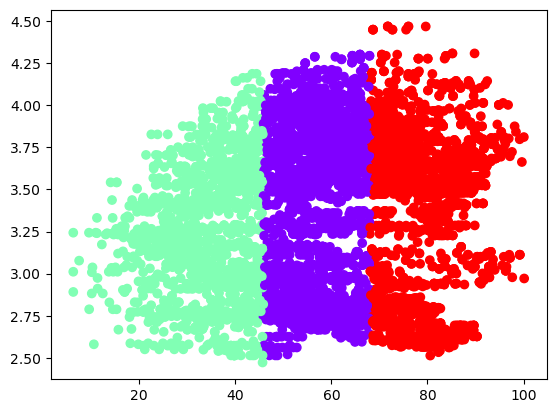

In [187]:
plt.scatter(x = df1["Temperature"], y = df1["Fuel_Price"],c=prediction,cmap="rainbow")
plt.savefig("2D-2")

# 2D Clustering on Holiday_Flag and Fuel_Price

In [188]:
df2=df[["CPI","Fuel_Price"]]
df2

,CPI,Fuel_Price
0,211.096358,2.572
1,211.242170,2.548
2,211.289143,2.514
3,211.319643,2.561
4,211.350143,2.625
...,...,...
6430,192.013558,3.997
6431,192.170412,3.985
6432,192.327265,4.000
6433,192.330854,3.969


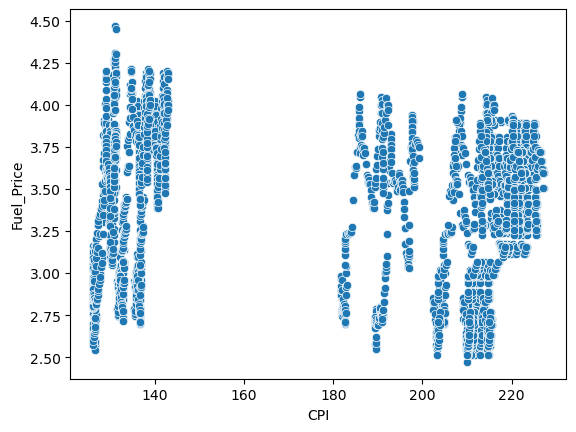

In [189]:
sns.scatterplot(x = df2["CPI"],y = df2["Fuel_Price"])
plt.savefig("SCATTER1")

In [190]:
wcss_list = []
k = np.arange(1,10)

for i in k:
    kmeans = KMeans(i)
    kmeans.fit(df2)
    kmeans.predict(df2)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)

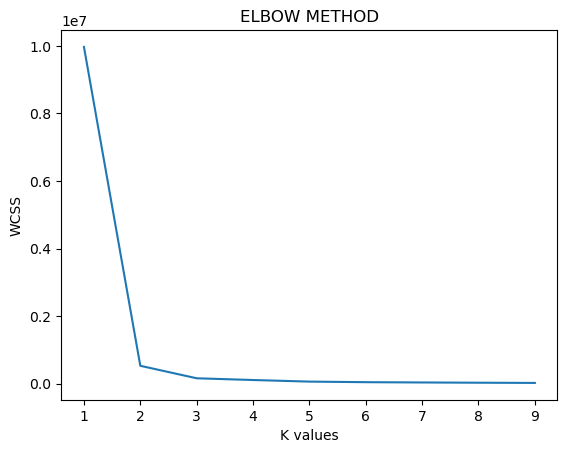

In [191]:
plt.plot(k,wcss_list)
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.savefig("2")

In [192]:
kmeans = KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [193]:
kmeans.fit(df2)

KMeans(n_clusters=2)

In [194]:
prediction = kmeans.predict(df2)
y = pd.DataFrame(prediction)

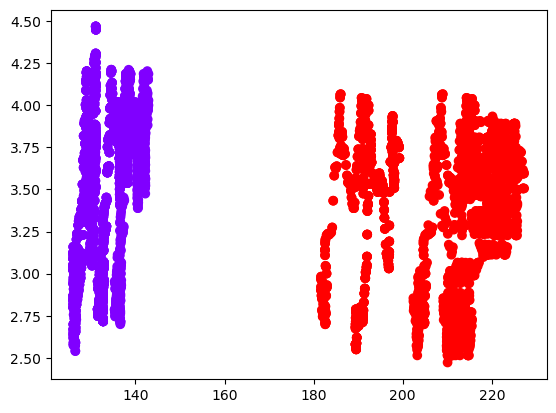

In [195]:
plt.scatter(x = df2["CPI"], y = df2["Fuel_Price"],c=prediction,cmap="rainbow")
plt.savefig("2D-3")

# 2D Clustering on Temperature and CPI

In [196]:
df3=df[["Temperature","CPI"]]
df3

,Temperature,CPI
0,42.31,211.096358
1,38.51,211.242170
2,39.93,211.289143
3,46.63,211.319643
4,46.50,211.350143
...,...,...
6430,64.88,192.013558
6431,64.89,192.170412
6432,54.47,192.327265
6433,56.47,192.330854


In [197]:
wcss_list = []
k = np.arange(1,10)

for i in k:
    kmeans = KMeans(i)
    kmeans.fit(df3)
    kmeans.predict(df3)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)

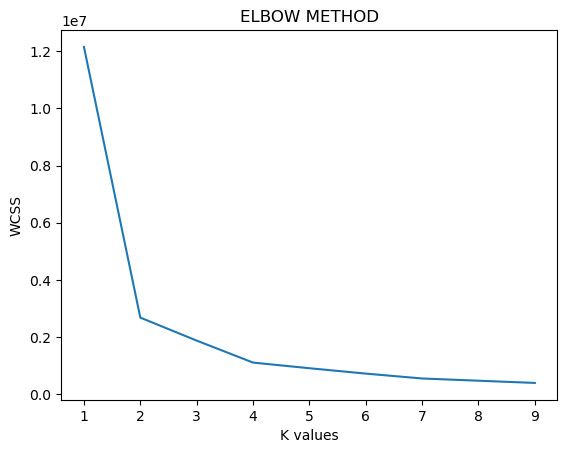

In [198]:
plt.plot(k,wcss_list)
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.savefig("3")

In [199]:
kmeans = KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [200]:
kmeans.fit(df3)

KMeans(n_clusters=2)

In [201]:
prediction = kmeans.predict(df3)
y = pd.DataFrame(prediction)

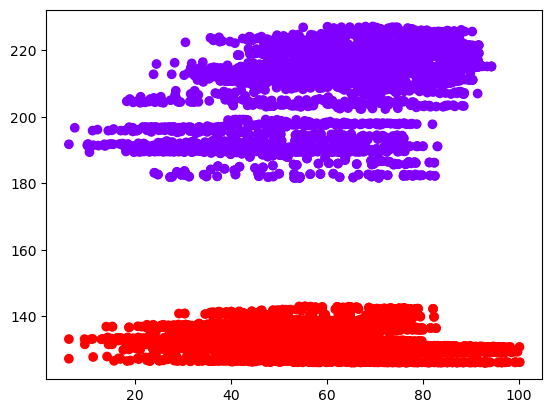

In [202]:
plt.scatter(x = df3["Temperature"], y = df3["CPI"],c=prediction,cmap="rainbow")
plt.savefig("2D-4")

## k=4

In [203]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [204]:
kmeans.fit(df3)

KMeans(n_clusters=4)

In [205]:
prediction = kmeans.predict(df3)
y = pd.DataFrame(prediction)

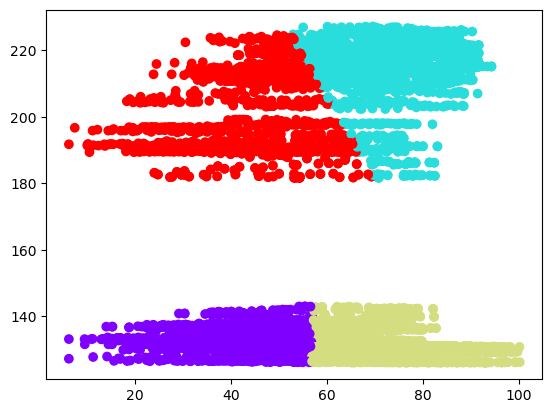

In [206]:
plt.scatter(x = df3["Temperature"], y = df3["CPI"],c=prediction,cmap="rainbow")
plt.savefig("2D-5")

# 3D Clustering 

In [207]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [208]:
Data = df[['Weekly_Sales', 'Temperature', 'Fuel_Price']]

# Choose the number of clusters
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(Data)

# Add cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# View the resulting DataFrame
print(df)

      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90           0.0        42.31       2.572  211.096358   
1         1    1641957.44           0.0        38.51       2.548  211.242170   
2         1    1611968.17           0.0        39.93       2.514  211.289143   
3         1    1409727.59           0.0        46.63       2.561  211.319643   
4         1    1554806.68           0.0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95           0.0        64.88       3.997  192.013558   
6431     45     733455.07           0.0        64.89       3.985  192.170412   
6432     45     734464.36           0.0        54.47       4.000  192.327265   
6433     45     718125.53           0.0        56.47       3.969  192.330854   
6434     45     760281.43           0.0        58.85       3.882  192.308899   

      Unemployment  Cluster  
0        

In [209]:
print("Inertia:", kmeans.inertia_)

Inertia: 254448796822513.03


In [210]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(Data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5998426280034928


In [211]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [138]:
import plotly.express as px

# Assuming Df_Std is your DataFrame with columns: 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
df['Cluster'] = kmeans.labels_

# Create 3D scatter plot
fig = px.scatter_3d(df, x='Weekly_Sales', y='Temperature', z='Fuel_Price', color='Cluster', symbol='Cluster')

# Update layout for better visibility and set width and height
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[min(df['Weekly_Sales']), max(df['Weekly_Sales'])]),
        yaxis=dict(nticks=4, range=[min(df['Temperature']), max(df['Temperature'])]),
        zaxis=dict(nticks=4, range=[min(df['Fuel_Price']), max(df['Fuel_Price'])]),
    ),
    width=1200,  # Set the desired width
    height=1000  # Set the desired height
)

# Show the plot
fig.show()

# 3D Clustering on 'Holiday_Flag', 'Temperature','CPI'

In [139]:
Data = df[['Holiday_Flag', 'Temperature', 'CPI']]

# Choose the number of clusters
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(Data)

# Add cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# View the resulting DataFrame
print(df)

      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1    1643690.90           0.0        42.31       2.572  211.096358   
1         1    1641957.44           0.0        38.51       2.548  211.242170   
2         1    1611968.17           0.0        39.93       2.514  211.289143   
3         1    1409727.59           0.0        46.63       2.561  211.319643   
4         1    1554806.68           0.0        46.50       2.625  211.350143   
...     ...           ...           ...          ...         ...         ...   
6430     45     713173.95           0.0        64.88       3.997  192.013558   
6431     45     733455.07           0.0        64.89       3.985  192.170412   
6432     45     734464.36           0.0        54.47       4.000  192.327265   
6433     45     718125.53           0.0        56.47       3.969  192.330854   
6434     45     760281.43           0.0        58.85       3.882  192.308899   

      Unemployment  Cluster  
0        

In [140]:
print("Inertia:", kmeans.inertia_)

Inertia: 1877228.7437877576


In [141]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(Data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5746990876396805


In [142]:
import plotly.express as px

# Assuming Df_Std is your DataFrame with columns: 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
df['Cluster'] = kmeans.labels_

# Create 3D scatter plot
fig = px.scatter_3d(df, x='Holiday_Flag', y='Temperature', z='CPI', color='Cluster', symbol='Cluster')

# Update layout for better visibility and set width and height
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[min(df['Holiday_Flag']), max(df['Holiday_Flag'])]),
        yaxis=dict(nticks=4, range=[min(df['Temperature']), max(df['Temperature'])]),
        zaxis=dict(nticks=4, range=[min(df['CPI']), max(df['CPI'])]),
    ),
    width=1200,  # Set the desired width
    height=1000  # Set the desired height
)

# Show the plot
fig.show()